# Algo Chain

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
cancer = load_breast_cancer()
X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,random_state=0)

In [3]:
scaler = MinMaxScaler().fit(X_train,y_train)

In [4]:
X_train_scaled = scaler.transform(X_train)
svc = SVC().fit(X_train_scaled,y_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
svc.score(X_test_scaled,y_test)

0.972027972027972

In [6]:
from sklearn.model_selection import GridSearchCV

In [7]:
param_grid = {'C':[0.001,0.01,0.1,1,10,100],'gamma':[0.001,0.01,0.1,1,10,100]}

In [8]:
grid_ = GridSearchCV(SVC(),param_grid=param_grid,cv=5)
grid_.fit(X_train_scaled,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]})

In [9]:
print(grid_.score(X_test_scaled,y_test))
print(grid_.best_params_)
print(grid_.best_score_)

0.972027972027972
{'C': 1, 'gamma': 1}
0.9812311901504789


In [10]:
import mglearn

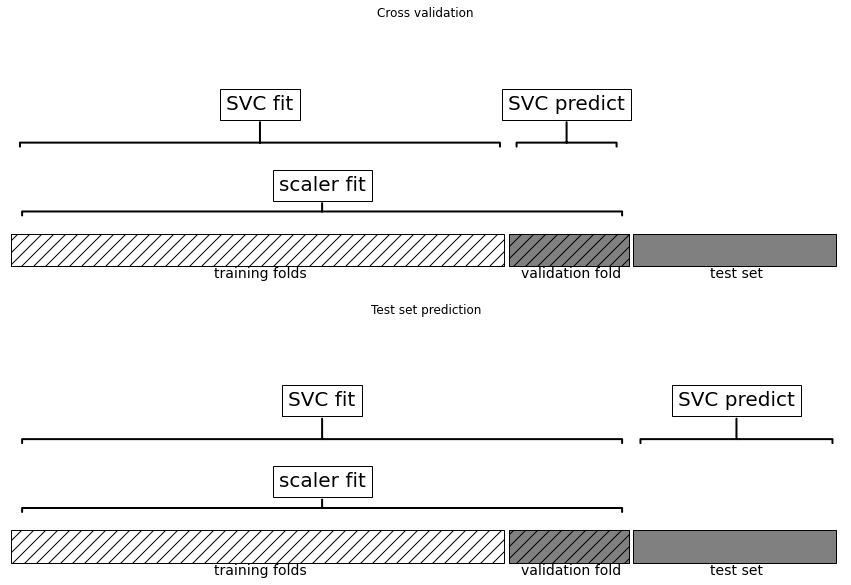

In [11]:
mglearn.plots.plot_improper_processing()

# Pipeline

In [12]:
from sklearn.pipeline import Pipeline

In [13]:
pipe = Pipeline([('scaler',MinMaxScaler()),('svm',SVC())])

In [14]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', MinMaxScaler()), ('svm', SVC())])

In [15]:
pipe.score(X_test,y_test)

0.972027972027972

In [16]:
param_grid = {'svm__C':[0.001,0.01,0.1,1,10,100],'svm__gamma':[0.001,0.01,0.1,1,10,100]}

In [17]:
grid = GridSearchCV(pipe,param_grid,cv=5)

In [18]:
grid.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('svm', SVC())]),
             param_grid={'svm__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'svm__gamma': [0.001, 0.01, 0.1, 1, 10, 100]})

In [19]:
print(grid.score(X_test,y_test))
print(grid.best_params_)
print(grid.best_score_)

0.972027972027972
{'svm__C': 1, 'svm__gamma': 1}
0.9812311901504789


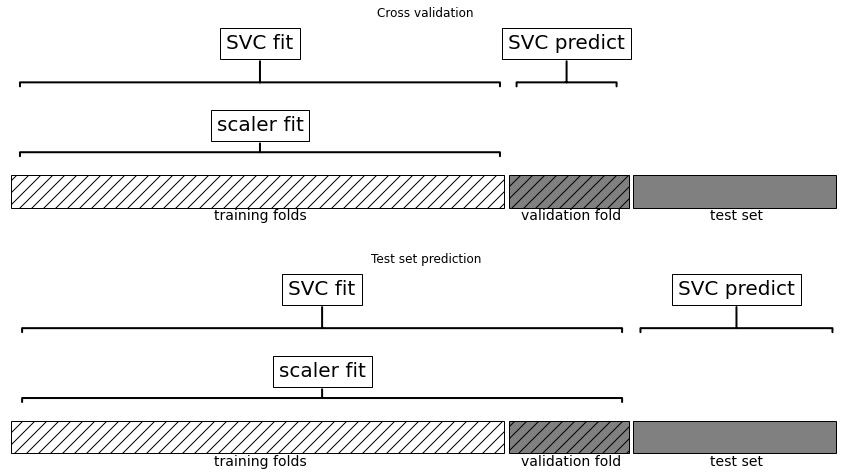

In [20]:
mglearn.plots.plot_proper_processing()

In [21]:
import numpy as np 
rnd = np.random.RandomState(seed=0)
X = rnd.normal(size=(100, 10000))
y = rnd.normal(size=(100,))

In [23]:
from sklearn.feature_selection import SelectPercentile, f_regression

In [24]:
sel = SelectPercentile(score_func=f_regression,percentile=5).fit(X,y)

In [25]:
X_trans = sel.transform(X)

In [26]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge

In [27]:
np.mean(cross_val_score(Ridge(),X_trans,y,cv=5))

0.9057953065239822

In [28]:
pipe =  Pipeline([('scale',SelectPercentile(score_func=f_regression,percentile=5)),('ridge',Ridge())])
np.mean(cross_val_score(pipe,X,y,cv=5))

-0.2465542238495281

In [29]:
from sklearn.pipeline import make_pipeline

In [31]:
pipe_long = Pipeline([('scaler',MinMaxScaler()),('svc',SVC(C=100))])
pipe_short = make_pipeline(MinMaxScaler(),SVC(C=100))

In [32]:
pipe_short.steps

[('minmaxscaler', MinMaxScaler()), ('svc', SVC(C=100))]

In [33]:
pipe_long.steps

[('scaler', MinMaxScaler()), ('svc', SVC(C=100))]

In [35]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


pipe =  make_pipeline(StandardScaler(),PCA(n_components=2),StandardScaler())
pipe.steps

[('standardscaler-1', StandardScaler()),
 ('pca', PCA(n_components=2)),
 ('standardscaler-2', StandardScaler())]

In [36]:
pipe.fit(cancer.data)

Pipeline(steps=[('standardscaler-1', StandardScaler()),
                ('pca', PCA(n_components=2)),
                ('standardscaler-2', StandardScaler())])

In [40]:
pipe.named_steps['pca'].components_.shape

(2, 30)

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
pipe = make_pipeline(StandardScaler(),LogisticRegression())

In [43]:
pipe.named_steps

{'standardscaler': StandardScaler(),
 'logisticregression': LogisticRegression()}

In [51]:
param_grid = {'logisticregression__C':[0.01, 0.1, 1, 10, 100]}

X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,random_state=0)

In [52]:
grid = GridSearchCV(pipe,param_grid,cv=5)

In [54]:
import warnings 
warnings.filterwarnings('ignore')

In [55]:
grid.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('logisticregression',
                                        LogisticRegression())]),
             param_grid={'logisticregression__C': [0.01, 0.1, 1, 10, 100]})

In [58]:
grid.best_estimator_

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(C=1))])

In [60]:
grid.best_estimator_.named_steps['logisticregression'].coef_

array([[-0.29792942, -0.58056355, -0.3109406 , -0.377129  , -0.11984232,
         0.42855478, -0.71131106, -0.85371164, -0.46688191,  0.11762548,
        -1.38262136,  0.0899184 , -0.94778563, -0.94686238,  0.18575731,
         0.99305313,  0.11090349, -0.3458275 ,  0.20290919,  0.80470317,
        -0.91626377, -0.91726667, -0.8159834 , -0.86539197, -0.45539191,
         0.10347391, -0.83009341, -0.98445173, -0.5920036 , -0.61086989]])

In [61]:
from sklearn.datasets import load_boston

In [62]:
boston = load_boston()
X_train,X_test,y_train,y_test = train_test_split(boston.data,boston.target,random_state=0)

In [64]:
from sklearn.preprocessing import PolynomialFeatures

In [66]:
pipe = make_pipeline(StandardScaler(),PolynomialFeatures(),Ridge())

In [67]:
param_grid = {'polynomialfeatures__degree': [1, 2, 3],
'ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

In [68]:
grid = GridSearchCV(pipe,param_grid,cv=5)

In [69]:
grid.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('ridge', Ridge())]),
             param_grid={'polynomialfeatures__degree': [1, 2, 3],
                         'ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100]})

In [80]:
grid.cv_results_['mean_test_score']

array([ 7.21915761e-01,  7.21919281e-01,  7.21954085e-01,  7.22265610e-01,
        7.23325945e-01,  7.07951636e-01,  7.60170834e-01,  7.59448408e-01,
        7.66651449e-01,  7.94966818e-01,  8.28726141e-01,  8.04832665e-01,
       -5.81095202e+02, -1.60898751e+02, -1.31972858e+01, -3.17933469e-02,
        6.48340571e-01,  6.54083028e-01])

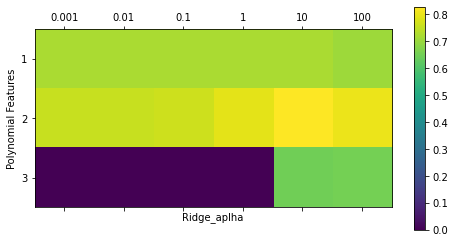

In [73]:
import matplotlib.pyplot as plt
plt.matshow(grid.cv_results_['mean_test_score'].reshape(3,-1),vmin=0,cmap='viridis')
plt.xlabel('Ridge_aplha')
plt.ylabel('Polynomial Features')
plt.xticks(range(len(param_grid['ridge__alpha'])), param_grid['ridge__alpha'])
plt.yticks(range(len(param_grid['polynomialfeatures__degree'])),
param_grid['polynomialfeatures__degree'])
plt.colorbar()

In [81]:
grid.best_params_

{'polynomialfeatures__degree': 2, 'ridge__alpha': 10}

In [82]:
grid.score(X_test,y_test)

0.7683045464100131

In [83]:
from sklearn.ensemble import RandomForestClassifier
param_grid = [
{'classifier': [SVC()], 'preprocessing': [StandardScaler(), None],
'classifier__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]},
{'classifier': [RandomForestClassifier(n_estimators=100)],
'preprocessing': [None], 'classifier__max_features': [1, 2, 3]}]

In [85]:
pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', SVC())])
X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, random_state=0)
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best params:\n{}\n".format(grid.best_params_))
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Test-set score: {:.2f}".format(grid.score(X_test, y_test)))

Best params:
{'classifier': SVC(C=10, gamma=0.01), 'classifier__C': 10, 'classifier__gamma': 0.01, 'preprocessing': StandardScaler()}

Best cross-validation score: 0.99
Test-set score: 0.98
